In [1]:
from astropy.time import Time

import matplotlib.pyplot as plt

from poliastro.bodies import Sun, Earth, Mars
from poliastro.ephem import Ephem
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.plotting.static import StaticOrbitPlotter
from poliastro.util import time_range

In [3]:
# Departure and time of flight for the mission
EPOCH_DPT = Time("2018-12-01", scale="tdb")
EPOCH_ARR = Time("2020-12-01", scale="tdb")

epochs = time_range(EPOCH_DPT, end=EPOCH_ARR)

# Origin and target orbits
earth = Ephem.from_body(Earth, epochs=epochs)
mars = Ephem.from_body(Mars, epochs=epochs)

earth_departure = Orbit.from_ephem(Sun, earth, EPOCH_DPT)
mars_arrival = Orbit.from_ephem(Sun, mars, EPOCH_ARR)

In [4]:
def lambert_transfer(ss_dpt, ss_arr, revs):
    """ Returns the short and long transfer orbits when solving Lambert's problem.

    Parameters
    ----------
    ss_dpt: poliastro.twobody.Orbit
        Deprature orbit.
    ss_arr: poliastro.twobody.Orbit
        Arrival orbit.
    revs: int
        Number of revolutions.

    Returns
    -------
    ss_short: poliastro.twobody.Orbit
        Short transfer orbit.
    ss_long: poliastro.twobody.Orbit
        Long transfer orbit.
    """

    # Solving for short and long maneuvers
    lambert_short = Maneuver.lambert(earth_departure, mars_arrival, short=True, M=revs)
    lambert_long = Maneuver.lambert(earth_departure, mars_arrival, short=False, M=revs)

    # Aplly both maneuvers
    ss_short, _ = ss_dpt.apply_maneuver(lambert_short, intermediate=True)
    ss_long, _ = ss_dpt.apply_maneuver(lambert_long, intermediate=True)

    return ss_short, ss_long

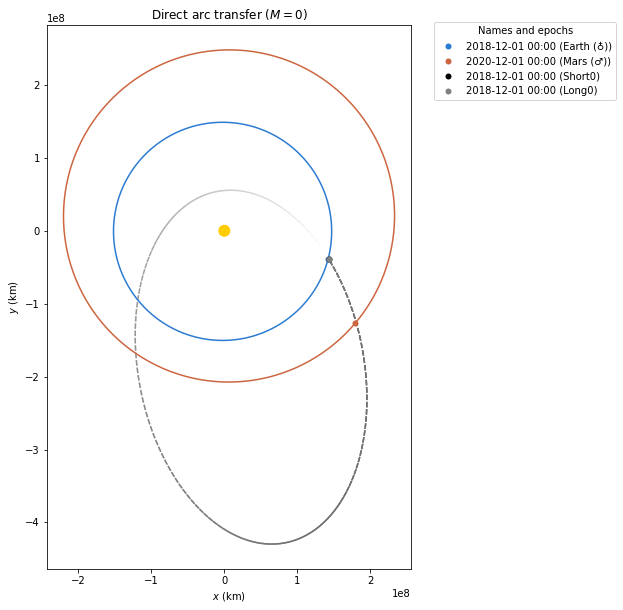

In [5]:
# Solving for direct (M=0) transfer long and short arcs
ss_short0, ss_long0 = lambert_transfer(earth_departure, mars_arrival, revs=0)

fig, ax = plt.subplots(figsize=(5,10))
op = StaticOrbitPlotter(ax=ax)
ax.set_title("Direct arc transfer ($M=0$)")

orbit_set = {ss_short0: ["Short0", "black"],
            ss_long0: ["Long0", "grey"]}

op.plot_body_orbit(Earth, EPOCH_DPT)
op.plot_body_orbit(Mars, EPOCH_ARR)

for ss in orbit_set:
    op.plot(ss, label=orbit_set[ss][0], color=orbit_set[ss][-1], trail=True)

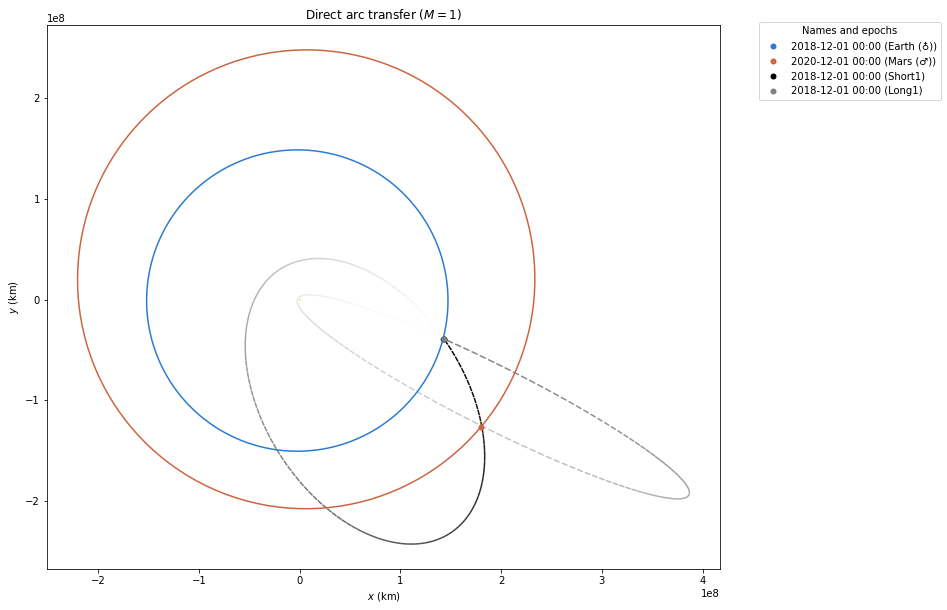

In [6]:
# Solving for M=1 long and short arc transfers
ss_short1, ss_long1 = lambert_transfer(earth_departure, mars_arrival, revs=1)

fig, ax = plt.subplots(figsize=(5,10))
op = StaticOrbitPlotter(ax=ax)
ax.set_title("Direct arc transfer ($M=1$)")

orbit_set = {ss_short1: ["Short1", "black"],
            ss_long1: ["Long1", "grey"]}

op.plot_body_orbit(Earth, EPOCH_DPT)
op.plot_body_orbit(Mars, EPOCH_ARR)

for ss in orbit_set:
    op.plot(ss, label=orbit_set[ss][0], color=orbit_set[ss][-1], trail=True)

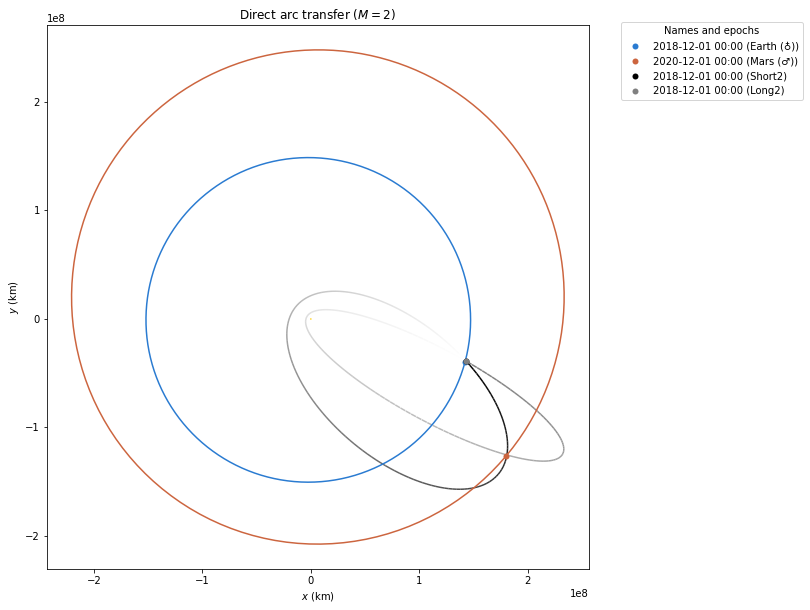

In [7]:
# Solving for M=2 long and short transfer arcs
ss_short2, ss_long2 = lambert_transfer(earth_departure, mars_arrival, revs=2)

fig, ax = plt.subplots(figsize=(5,10))
op = StaticOrbitPlotter(ax=ax)
ax.set_title("Direct arc transfer ($M=2$)")

orbit_set = {ss_short2: ["Short2", "black"],
            ss_long2: ["Long2", "grey"]}

op.plot_body_orbit(Earth, EPOCH_DPT)
op.plot_body_orbit(Mars, EPOCH_ARR)

for ss in orbit_set:
    op.plot(ss, label=orbit_set[ss][0], color=orbit_set[ss][-1], trail=True)

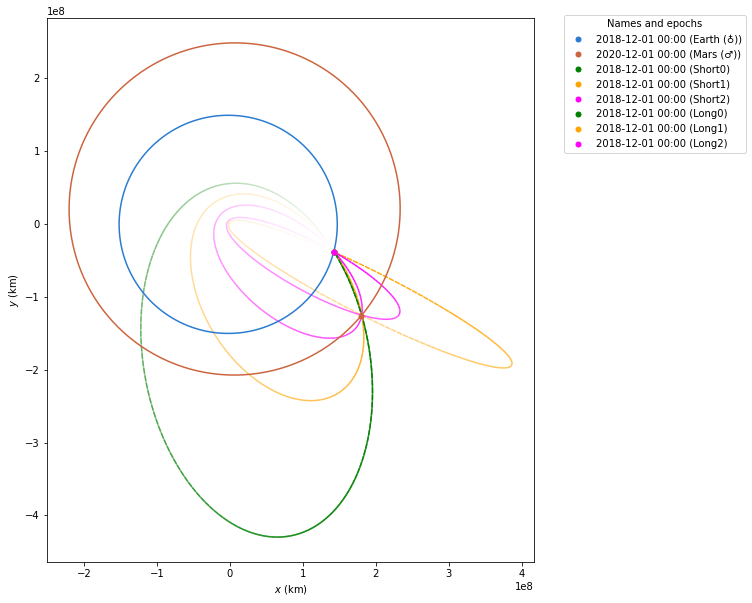

In [8]:
# Plot all solutions together
fig, ax = plt.subplots(figsize=(5,10))
op = StaticOrbitPlotter(ax=ax)
ss_lines = []

orbit_set = {ss_short0: ["Short0", "green", "-."],
            ss_short1: ["Short1", "orange", "-."],
            ss_short2: ["Short2", "magenta", "-."],
            ss_long0: ["Long0", "green", "--"],
            ss_long1: ["Long1", "orange", "--"],
            ss_long2: ["Long2", "magenta", "--"],
            }

op.plot_body_orbit(Earth, EPOCH_DPT)
op.plot_body_orbit(Mars, EPOCH_ARR)

for ss in orbit_set:
    lines = op.plot(ss, label=orbit_set[ss][0], color=orbit_set[ss][1], trail=True)
    lines[0].set_linestyle(orbit_set[ss][-1])